In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

In [1]:
#importing all the required libraries

import pathlib

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

from tensorflow.keras.preprocessing.image import load_img

In [2]:
#defining the path containing the train and the test data

data_dir_train=pathlib.Path("/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test=pathlib.Path("/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [3]:
#counting the number of the total number of images in the both train and test data set

image_count_train=len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test=len(list(data_dir_test.glob("*/*.jpg")))
print(image_count_test)

2239
118


In [4]:
#defining the image dimensions and batch size

batch_size=32
img_height=180
img_width=180

Found 6739 files belonging to 9 classes.


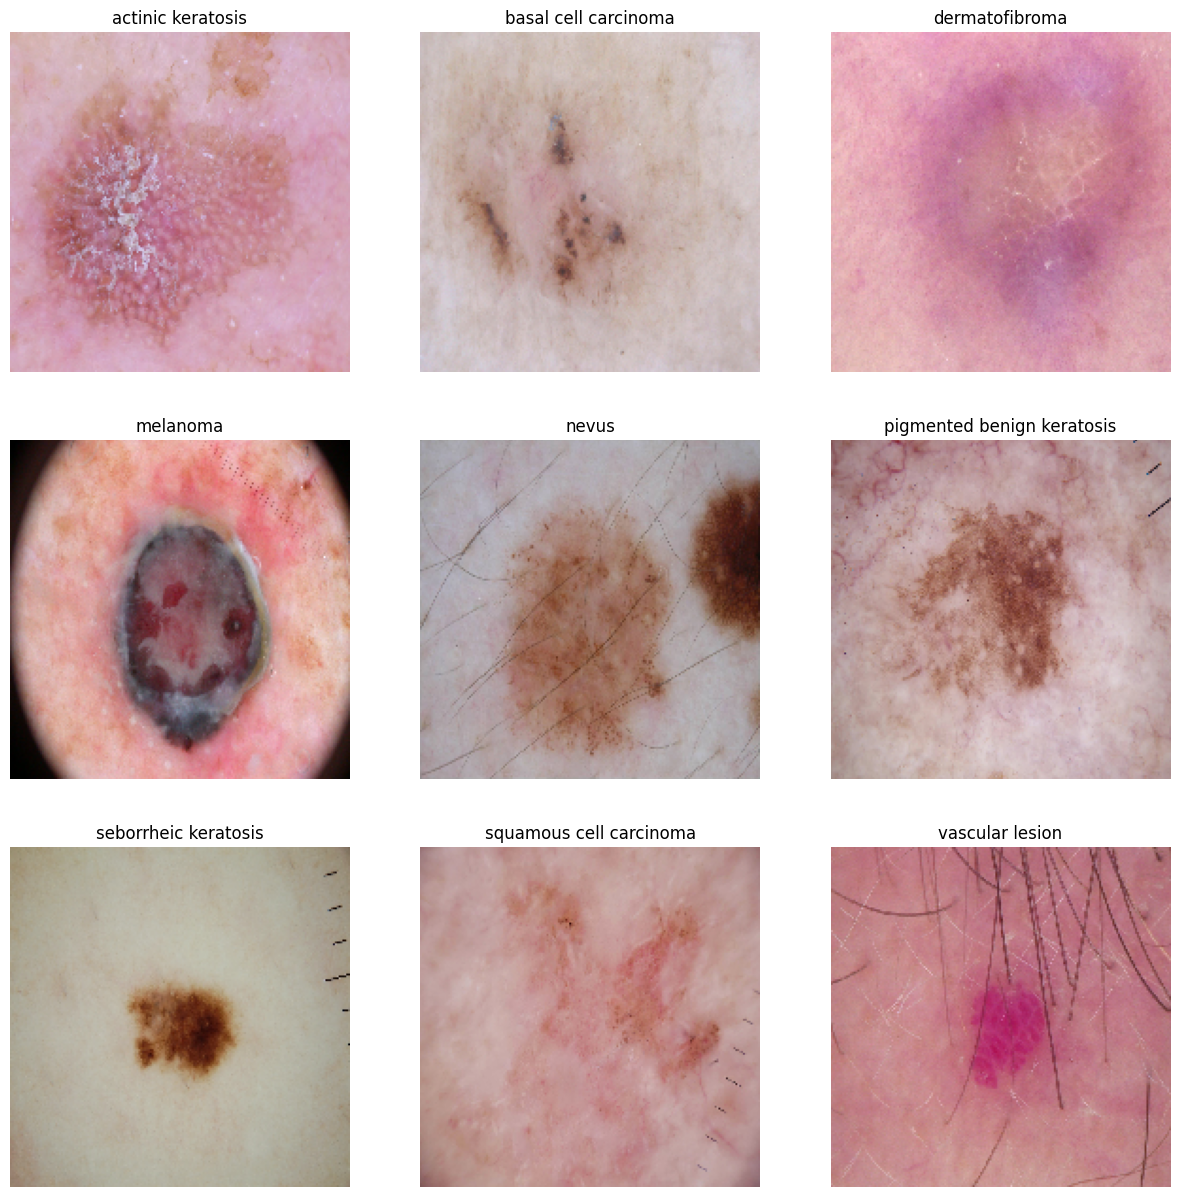

In [5]:
#displaying the images from the train data set

image_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(img_height,img_width),
                                                             label_mode="categorical",seed=123)

class_names=image_ds.class_names

files_path_dict={} #defining empty dictionary to store the path of images for various classes

for c in class_names:
    files_path_dict[c]=list(map(lambda x:str(data_dir_train)+"/"+c+"/"+x,os.listdir(str(data_dir_train)+"/"+c)))

#displaying the image

plt.figure(figsize=(15,15))
index=0

for c in class_names:
    path_list=files_path_dict[c][:1]
    index+=1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis('off')

In [6]:
#defining the function for counting the distribution of images in various classes

def class_distribution(dir):
    count=[]
    for path in pathlib.Path(dir).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path,name))]))

    sub_directory=[name for name in os.listdir(dir) if os.path.isdir(os.path.join(dir,name))]
    return pd.DataFrame(list(zip(sub_directory,count)),columns=["Class","Count of Images"])

df=class_distribution(data_dir_train)

In [7]:
df

,Class,Count of Images
0,dermatofibroma,95
1,squamous cell carcinoma,181
2,vascular lesion,139
3,melanoma,438
4,basal cell carcinoma,376
5,seborrheic keratosis,77
6,pigmented benign keratosis,462
7,actinic keratosis,114
8,nevus,357


In [ ]:
#installing the Augemtor which is used for making copies of images to increase the training data
!pip install Augmentor

In [ ]:
path_training_dataset="/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor

for i in class_names:
    p=Augmentor.Pipeline(path_training_dataset+i)
    p.rotate(probability=0.7,max_left_rotation=10,max_right_rotation=10)
    p.sample(500)#generating 500 samples of each class

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DC7070C3F10>: 100%|██████████| 500/500 [00:21<00:00, 22.79 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DC7040BC640>: 100%|██████████| 500/500 [00:26<00:00, 18.97 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DC6F07E0040>: 100%|██████████| 500/500 [00:21<00:00, 23.49 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DC6FC14C2E0>: 100%|██████████| 500/500 [01:32<00:00,  5.43 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7DC6FFF8EA70>: 100%|██████████| 500/500 [01:18<00:00,  6.39 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DC6FC14C550>: 100%|██████████| 500/500 [00:19<00:00, 26.00 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DC7040BFF10>: 100%|██████████| 500/500 [00:45<00:00, 10.88 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DC704154B80>: 100%|██████████| 500/500 [00:18<00:00, 26.57 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DC68549C670>: 100%|██████████| 500/500 [00:19<00:00, 25.23 Samples/s]


In [8]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:
#Model Building

In [9]:
#defining the training dataset from the directory which contains the train data
train_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size, image_size=(img_height,img_width), label_mode="categorical",seed=123,subset="training",validation_split=0.2)



Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [10]:
#defining the validation dataset from the directory which contains the train data
val_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size, image_size=(img_height,img_width), label_mode="categorical",seed=123,subset="validation",validation_split=0.2)


Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
#building model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3))) #adding the input layer
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))#adding the first convulation layer
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding='same'))#adding the second convulation layer
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))#adding the third convulation layer
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), padding='same'))#adding the forth convulation layer
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))#adding the fifth convulation layer
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())#adding the flatting layer
model.add(Dense(512,kernel_regularizer=l2(0.01))) #adding the dense layer
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_names)))
model.add(Activation('softmax'))




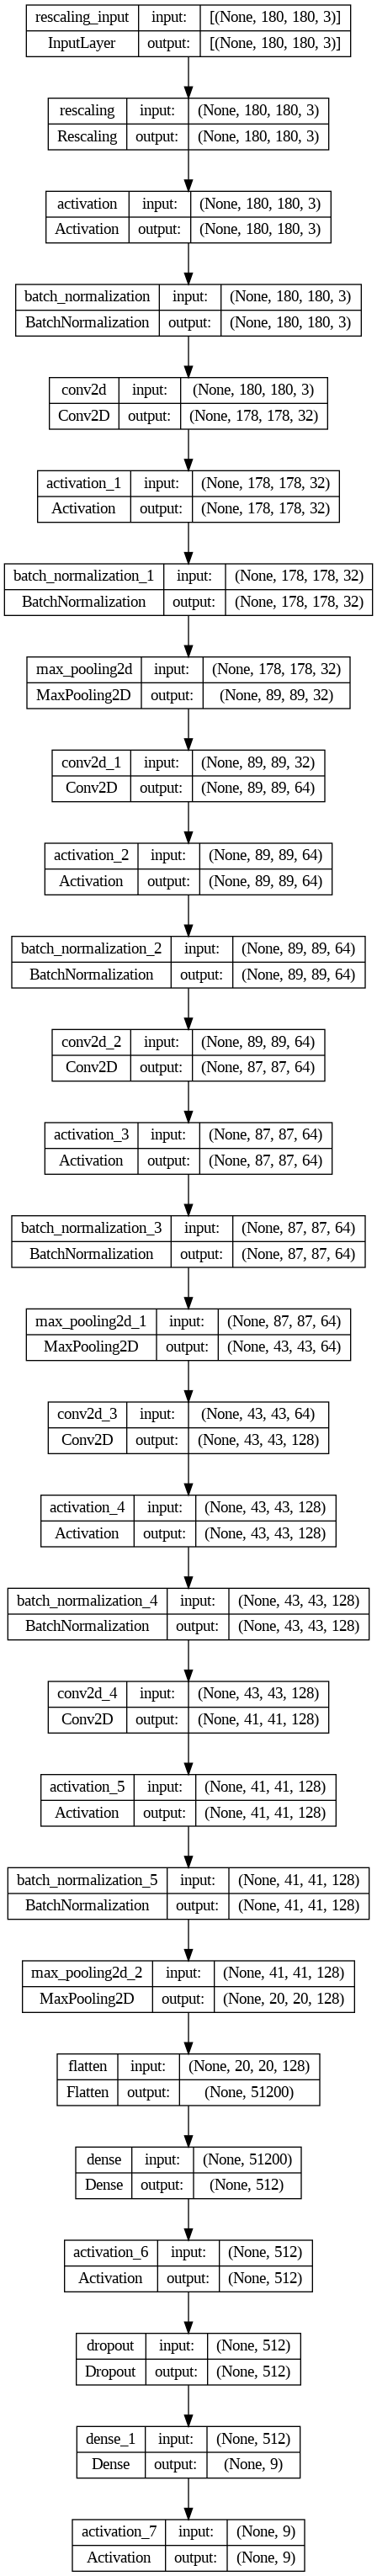

In [13]:
# dispaying the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [14]:
#compiling the model

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

checkpoint=ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto", verbose=1)

earlystop=EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)



In [16]:
epochs = 30
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint])

Epoch 1/30
169/169 [==============================] - ETA: 0s - loss: 4.1276 - accuracy: 0.6780
Epoch 1: val_accuracy did not improve from 0.69636
169/169 [==============================] - 15s 87ms/step - loss: 4.1276 - accuracy: 0.6780 - val_loss: 4.2244 - val_accuracy: 0.6830
Epoch 2/30
169/169 [==============================] - ETA: 0s - loss: 4.1347 - accuracy: 0.7040
Epoch 2: val_accuracy did not improve from 0.69636
169/169 [==============================] - 15s 86ms/step - loss: 4.1347 - accuracy: 0.7040 - val_loss: 4.4109 - val_accuracy: 0.6793
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 3.9019 - accuracy: 0.7326
Epoch 3: val_accuracy did not improve from 0.69636
169/169 [==============================] - 15s 86ms/step - loss: 3.9019 - accuracy: 0.7326 - val_loss: 4.4317 - val_accuracy: 0.6949
Epoch 4/30
169/169 [==============================] - ETA: 0s - loss: 3.7608 - accuracy: 0.7455
Epoch 4: val_accuracy improved from 0.69636 to 0.72012, saving m

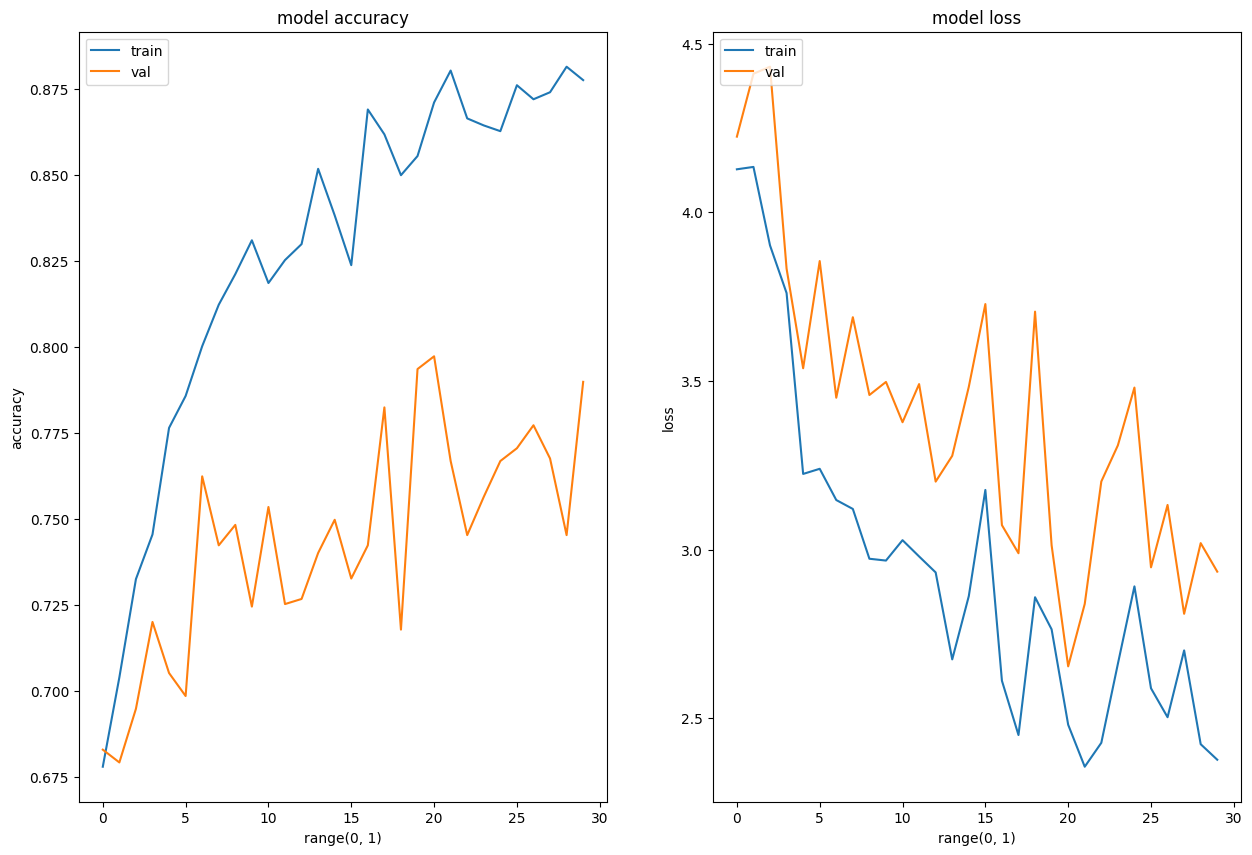

In [17]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()